BI-LSTM WITH ATTENTION MECHANISM

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Mount Google Drive
drive.mount('/content/drive')

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/crypto_prediction/bitcoin_prices.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0111 - mae: 0.0670 - val_loss: 0.0059 - val_mae: 0.0555
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0022 - mae: 0.0305 - val_loss: 0.0058 - val_mae: 0.0576
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - mae: 0.0285 - val_loss: 0.0087 - val_mae: 0.0769
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0018 - mae: 0.0264 - val_loss: 0.0136 - val_mae: 0.1014
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0016 - mae: 0.0249 - val_loss: 0.0024 - val_mae: 0.0351
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0016 - mae: 0.0245 - val_loss: 0.0012 - val_mae: 0.0263
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0013 - mae: 0.0231 - val_loss: 0.0037 - val_mae: 0.0473
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0014 - mae: 0.0229 - val_loss: 0.0019 - val_mae: 0.0309
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.001

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 30, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 30, 400)        │        323,200 │ input_layer_2[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 30, 400)        │              0 │ bidirectional_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 30, 200)        │        400,800 │ dropout_6[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 30, 200)        │              0 │ bidirectional_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_1 (Attention)   │ (None, 30, 200)        │              0 │ dropout_7[0][0],       │
│                           │                        │                │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 30, 400)        │              0 │ dropout_7[0][0],       │
│ (Concatenate)             │                        │                │ attention_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ (None, 50)             │         90,200 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 50)             │              0 │ lstm_8[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             51 │ dropout_8[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,442,755 (9.32 MB)

 Trainable params: 814,251 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,628,504 (6.21 MB)

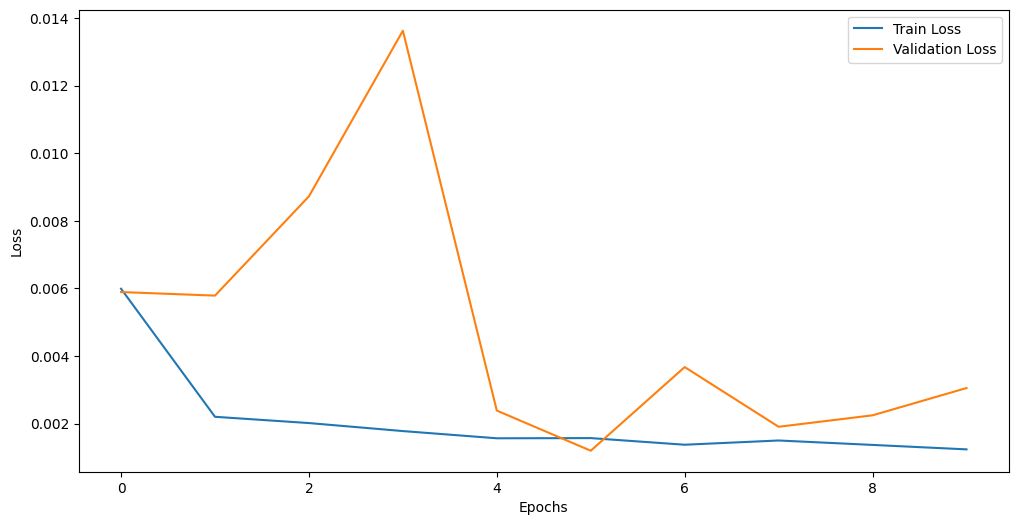

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.3516e-04 - mae: 0.0208
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Root Mean Squared Error: 0.03457053411907044
R-squared: 0.9679565108183551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Date: 2025-02-09, Predicted Price: 95269.1796875
Date: 2025-02-10, Predicted Price: 94772.859375
Date: 2025-02-11, Predicted Price: 94287.6171875
Date: 2025-02-12, Predicted Price: 93816.2265625
Date: 2025-02-13, Predicted Price: 93360.2109375
Date: 2025-02-14, Predicted Price: 92920.1328125
Date: 2025-02-15, Predicted Price: 92495.8984375


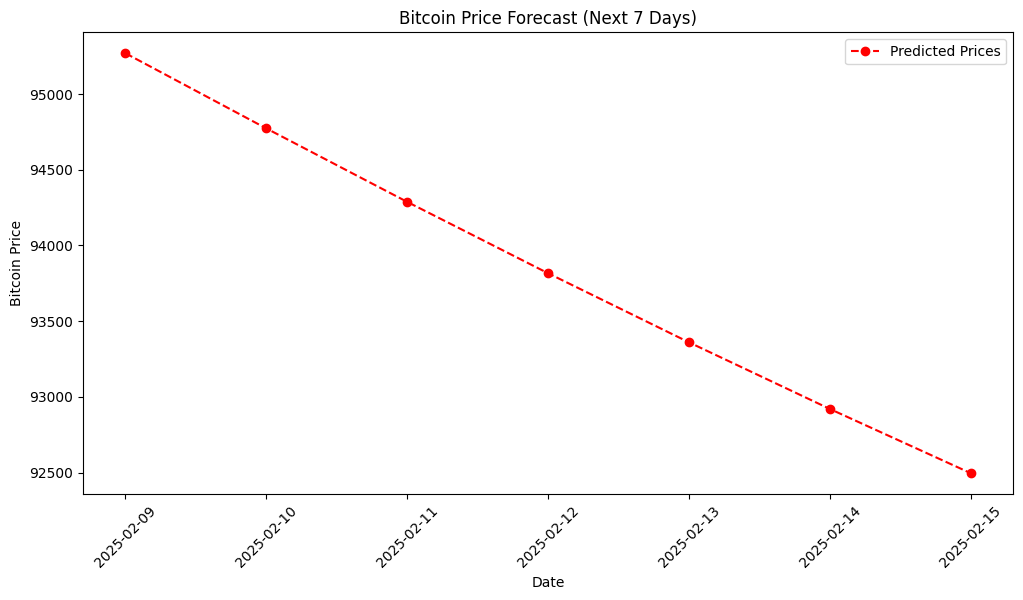

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df[['Close']].values)

# Split Data
train_size = int(len(data) * 0.80)
train_data, test_data = data[:train_size], data[train_size:]

def create_dataset(dataset, time_step=30):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Prepare Train/Test Sets
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape for LSTM Input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define BiLSTM Model with Attention
def build_attention_bilstm():
    inputs = Input(shape=(X_train.shape[1], 1))
    x = Bidirectional(LSTM(200, return_sequences=True))(inputs)
    x = Dropout(0.2)(x)
    x = Bidirectional(LSTM(100, return_sequences=True))(x)
    x = Dropout(0.2)(x)

    # Attention Layer
    attention = Attention()([x, x])
    x = tf.keras.layers.Concatenate(axis=-1)([x, attention])
    x = LSTM(50, return_sequences=False)(x)
    x = Dropout(0.5)(x)

    # Output Layer
    output = Dense(1, activation='linear')(x)

    model = Model(inputs, output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
    return model

# Build & Train Model
model = build_attention_bilstm()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1, callbacks=[early_stopping])

# Model Summary
model.summary()

# Plot Training Loss
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Evaluation
model.evaluate(X_test, y_test)
predicted = model.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
r2 = metrics.r2_score(y_test, predicted)
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Inverse Transform Predictions
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Function for Future Forecasting
def forecast_next_days(model, data, scaler, time_step=30, n_future=7):
    last_data = data[-time_step:].reshape(1, time_step, 1)
    future_predictions = []

    for _ in range(n_future):
        prediction = model.predict(last_data)
        future_predictions.append(prediction[0, 0])
        last_data = np.append(last_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_future)

    return future_dates, future_predictions

# Predict Next 7 Days
future_dates, future_predictions = forecast_next_days(model, data, scaler)

# Print Future Predictions
for date, price in zip(future_dates, future_predictions):
    print(f'Date: {date.date()}, Predicted Price: {price[0]}')

# Plot Future Predictions
plt.figure(figsize=(12,6))
plt.plot(future_dates, future_predictions, marker='o', label='Predicted Prices', color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price Forecast (Next 7 Days)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/crypto_prediction/bitcoin_prices.csv')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0150 - val_loss: 0.0132
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0038 - val_loss: 0.0161
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044 - val_loss: 0.0108
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0028 - val_loss: 0.0126
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0027 - val_loss: 0.0099
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 0.0114
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - val_loss: 0.0054
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025 - val_loss: 0.0081
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0024 - val_loss: 0.0083
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0023 - val_loss: 0.0093
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━

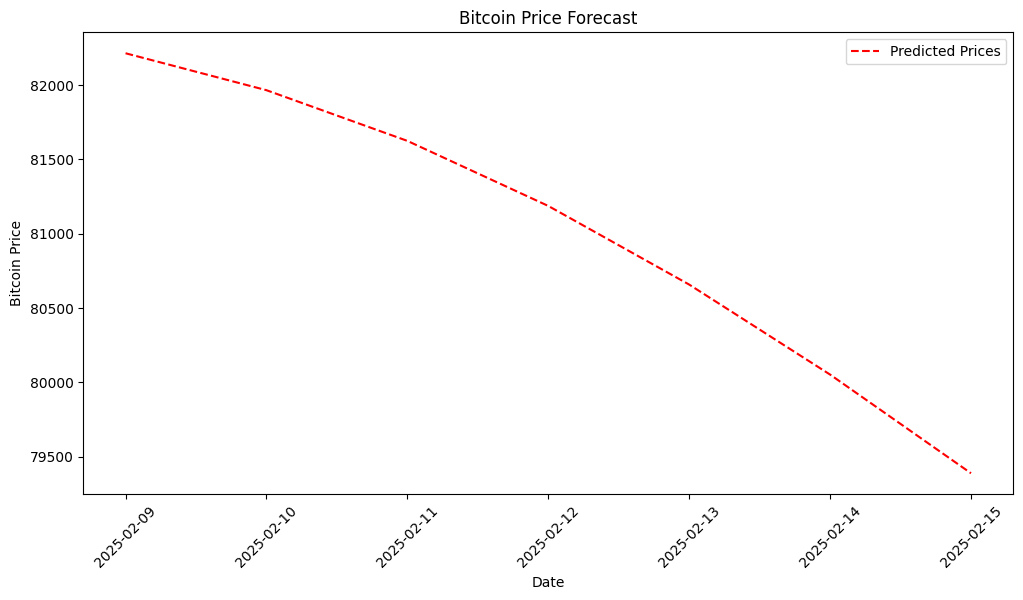

Root Mean Squared Error: 9911.205757190035
R-squared: 0.7513035212203336


In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Data Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df[['Close']].values)

# Split Data
training_size = int(len(data) * 0.80)
train_data, test_data = data[0:training_size], data[training_size:]

def create_dataset(dataset, time_step=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        dataX.append(dataset[i:(i + time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Prepare Data
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define LSTM Model
model = Sequential([
    LSTM(9, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(9, return_sequences=True),
    Dropout(0.2),
    LSTM(9),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)

# Predictions
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

def future_forecasting(model, data, n_future=7):
    input_sequence = data[-time_step:].copy()
    future_forecasts = []

    for _ in range(n_future):
        future_input = input_sequence.reshape((1, time_step, 1))
        forecast = model.predict(future_input)[0, 0]

        future_forecasts.append(forecast)
        input_sequence = np.append(input_sequence[1:], forecast).reshape(-1, 1)

    forecast_scaled = np.array(future_forecasts).reshape(-1, 1)
    forecast_actual = scaler.inverse_transform(forecast_scaled)

    last_date = df.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future)
    forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': forecast_actual.ravel()})
    return forecast_df

# Generate Future Forecast
pred_dataframe = future_forecasting(model, data)
print(pred_dataframe)

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(pred_dataframe['Date'], pred_dataframe['Predicted Price'], label='Predicted Prices', color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Performance Metrics
rmse = np.sqrt(metrics.mean_squared_error(real_prices, predicted_prices))
r2 = metrics.r2_score(real_prices, predicted_prices)
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


 *`Random`* Forest

Mean Squared Error: 181298040.41860154
Mean Absolute Error: 6435.209174490056
R-squared: 0.5948618729332955
Accuracy: 59.49%


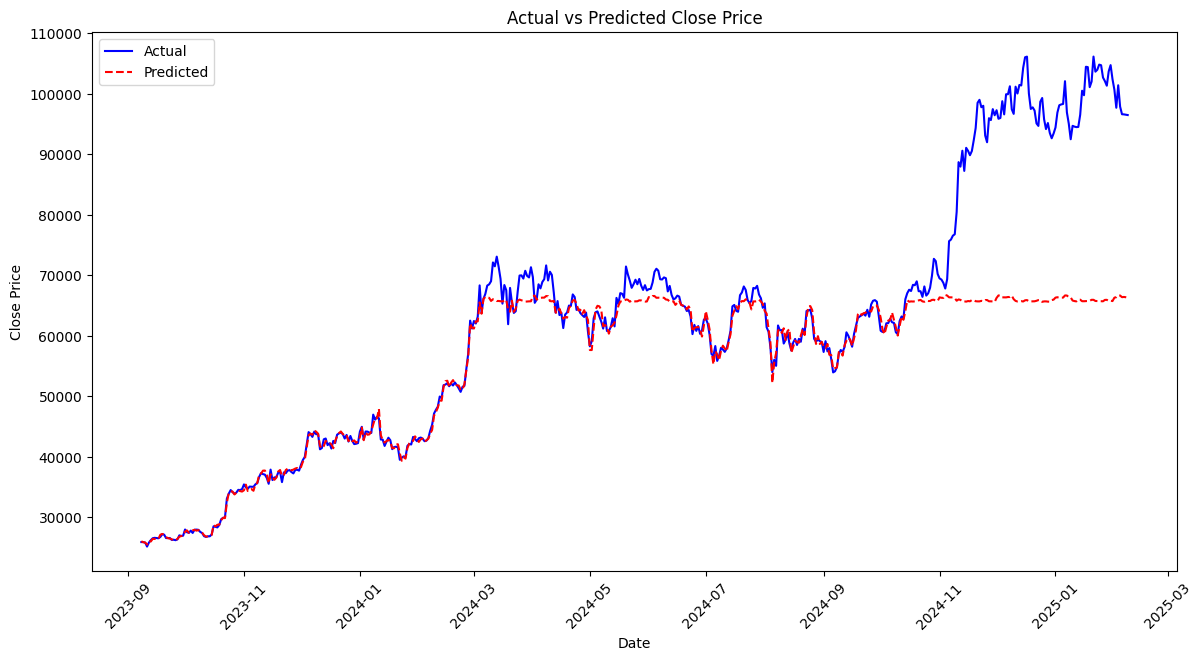

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-10-b0b90b899c99>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_features['Open'] = last_features['High'] = last_features['Low'] = prediction
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-10-b0b90b899c99>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Predicted Prices for Next 7 Days:
            Predicted Price
Date                       
2025-02-10     66000.627190
2025-02-11     65141.732247
2025-02-12     64819.714922
2025-02-13     64800.428691
2025-02-14     64882.228437
2025-02-17     64864.886249
2025-02-18     64922.604882


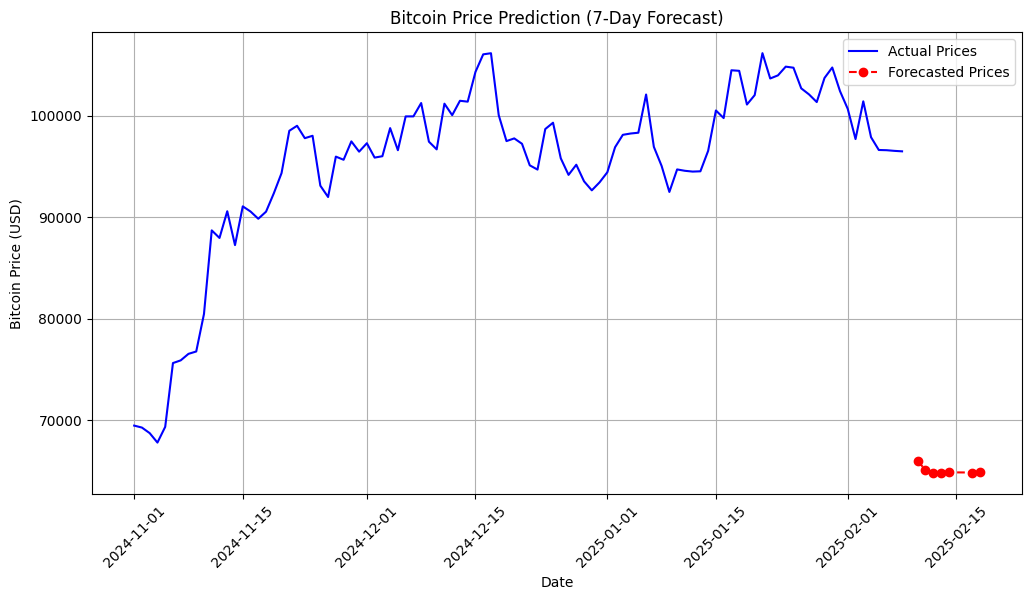

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('/content/drive/MyDrive/crypto_prediction/bitcoin_prices.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'DayOfWeek']]
y = df['Close']

# Train-Test Split (80% train, 20% test, keeping time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Make Predictions & Evaluate Model
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy:.2f}%')

# Plot Actual vs Predicted Prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle="dashed")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# --------------------- Future Forecasting Function ---------------------
def future_forecasting(model, last_known_data, days_to_predict=7):
    """
    Predicts future Bitcoin prices for the next `days_to_predict` days.
    """
    last_date = last_known_data.index[-1]

    # Generate future dates
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=days_to_predict, freq='B')

    future_data = []
    last_features = last_known_data.iloc[-1]

    for future_date in future_dates:
        features = np.array([
            last_features['Open'],
            last_features['High'],
            last_features['Low'],
            last_features['Volume'],
            future_date.year,
            future_date.month,
            future_date.day,
            future_date.dayofweek
        ]).reshape(1, -1)

        features_scaled = scaler.transform(features)
        prediction = model.predict(features_scaled)[0]

        future_data.append([future_date, prediction])

        # Update last_features to roll over the predictions
        last_features['Open'] = last_features['High'] = last_features['Low'] = prediction

    forecast_df = pd.DataFrame(future_data, columns=['Date', 'Predicted Price'])
    forecast_df.set_index('Date', inplace=True)
    return forecast_df


# Generate 7-Day Forecast
forecast_df = future_forecasting(model, df, days_to_predict=7)


print("\nPredicted Prices for Next 7 Days:")
print(forecast_df)


plt.figure(figsize=(12,6))
plt.plot(df.index[-100:], df['Close'].tail(100), label='Actual Prices', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted Price'], label='Forecasted Prices', color='red', linestyle='dashed', marker='o')
plt.xlabel("Date")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price Prediction (7-Day Forecast)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
